<a href="https://colab.research.google.com/github/lugabrield/Real-Estate-Cost-Benefit-Analysis/blob/main/casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
aluguel_casa = pd.read_excel('/content/houses_rent.xlsx')

In [3]:
aluguel_casa = aluguel_casa.rename(columns ={'parking spaces':'parking_space','rent amount': 'rent_amount', 'property tax':'property_tax','fire insurance':'fire_insurance'})
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [4]:
aluguel_casa = aluguel_casa.astype({'total':'float', 'area':'float','rent_amount':'float','property_tax':'float'})
aluguel_casa.dtypes

,0
index,int64
city,object
area,float64
rooms,int64
bathroom,int64
parking_space,int64
floor,object
animal,object
furniture,object
hoa,object


In [5]:
aluguel_casa = aluguel_casa[(aluguel_casa['total'] <= 4000) & (aluguel_casa['bathroom'] >= 2) & ( (aluguel_casa['rooms'] == 2) & (aluguel_casa['animal'] == 'accept') | (aluguel_casa['rooms'] == 3 ))]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
3,3,Barcelona,73.0,2,2,1,12,accept,not furnished,700,1250.0,150.0,16,2116.0
7,7,Barcelona,55.0,2,2,1,2,accept,not furnished,600,1300.0,67.0,17,1984.0
16,16,Porto,188.0,2,3,8,-,accept,not furnished,0,3010.0,584.0,46,3640.0
17,17,Barcelona,100.0,3,2,1,-,accept,not furnished,0,3500.0,260.0,53,3813.0
20,20,Barcelona,155.0,3,3,2,-,accept,not furnished,0,2650.0,233.0,40,2923.0


In [6]:
aluguel_casa = aluguel_casa.query(('total <= 4000 and bathroom > = 2 and animal == "accept" and rooms == 2 or rooms == 3 '))
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
3,3,Barcelona,73.0,2,2,1,12,accept,not furnished,700,1250.0,150.0,16,2116.0
7,7,Barcelona,55.0,2,2,1,2,accept,not furnished,600,1300.0,67.0,17,1984.0
16,16,Porto,188.0,2,3,8,-,accept,not furnished,0,3010.0,584.0,46,3640.0
17,17,Barcelona,100.0,3,2,1,-,accept,not furnished,0,3500.0,260.0,53,3813.0
20,20,Barcelona,155.0,3,3,2,-,accept,not furnished,0,2650.0,233.0,40,2923.0


In [7]:
agg_city_price = aluguel_casa.groupby(['city'])['total'].agg('mean').reset_index()
agg_city_price

,city,total
0,Barcelona,2995.179612
1,Porto,2718.711230


In [8]:
agg_bath_rooms_price = aluguel_casa.groupby(['bathroom','rooms'])['total'].agg('mean').reset_index()
agg_bath_rooms_price

,bathroom,rooms,total
0,2,2,2734.612903
1,2,3,2939.267956
2,3,2,3057.440000
3,3,3,3223.740000
4,4,2,3136.000000
5,4,3,3477.212121
6,5,3,3245.000000
7,6,3,3101.000000


In [9]:
import seaborn as sns

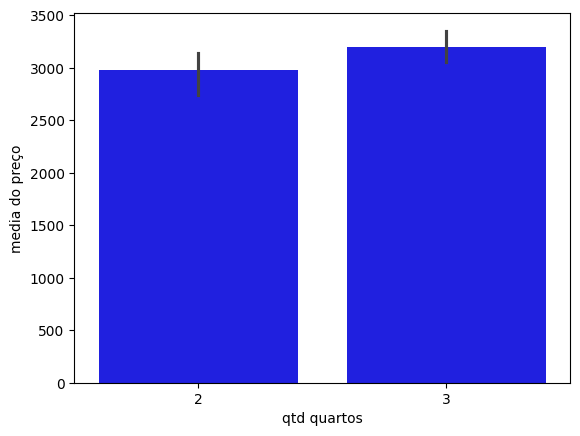

In [10]:
ax = sns.barplot(data=agg_bath_rooms_price, x='rooms', y='total', color = 'blue');
ax.set(xlabel = 'qtd quartos', ylabel = 'media do preço');

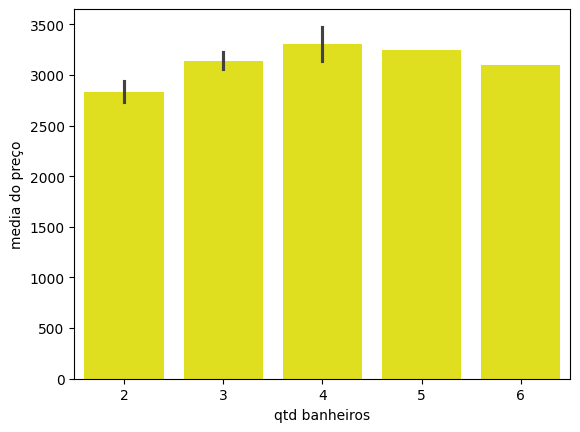

In [11]:
ax = sns.barplot(data=agg_bath_rooms_price, x='bathroom', y='total', color = 'yellow');
ax.set(xlabel = 'qtd banheiros', ylabel = 'media do preço');

In [12]:
agg_area = aluguel_casa[['area']]

In [13]:
agg_area = agg_area.query('area <= 125')

In [14]:
agg_area.describe()

,area
count,604.000000
mean,83.359272
std,18.774875
min,47.000000
25%,70.000000
50%,80.000000
75%,100.000000
max,125.000000


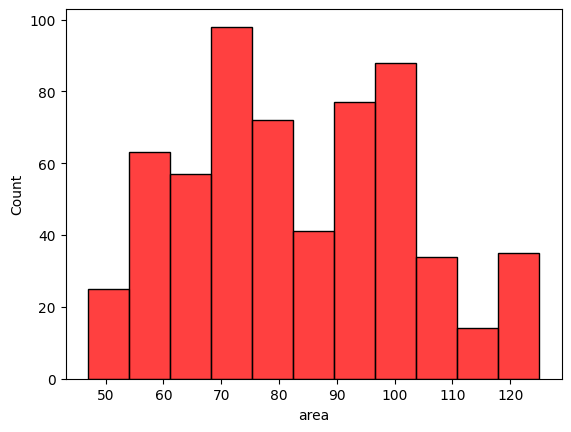

In [15]:
sns.histplot(data=agg_area, x='area', color = 'red');

<Axes: xlabel='property_tax', ylabel='Count'>

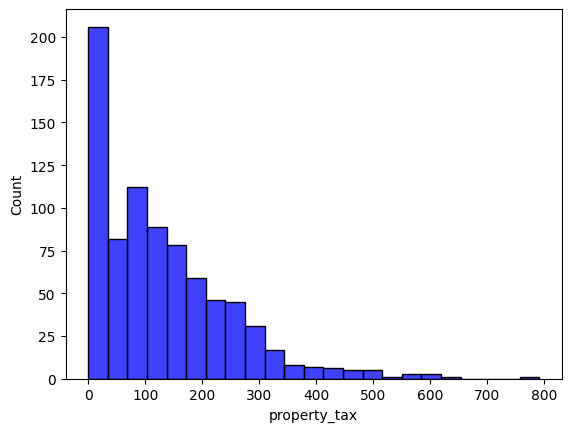

In [16]:
agg_property_tax = aluguel_casa[['property_tax']]
sns.histplot(data = agg_property_tax, x ='property_tax', color = 'blue')

In [17]:
agg_city_price

,city,total
0,Barcelona,2995.179612
1,Porto,2718.711230


<Axes: xlabel='total', ylabel='Count'>

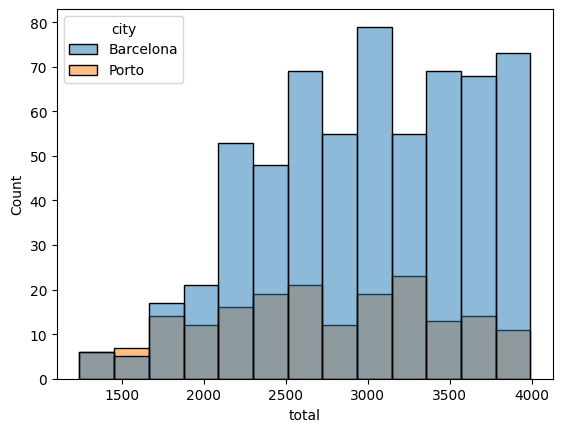

In [18]:
sns.histplot(data=aluguel_casa,x='total', hue = 'city')

In [19]:
aluguel_casa = aluguel_casa.query('city == "Porto" ')
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
16,16,Porto,188.0,2,3,8,-,accept,not furnished,0,3010.0,584.0,46,3640.0
28,28,Porto,150.0,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23,3443.0
36,36,Porto,94.0,3,3,2,1,accept,not furnished,750,2200.0,192.0,28,3170.0
51,51,Porto,74.0,3,2,1,7,accept,not furnished,650,1600.0,250.0,21,2521.0
65,65,Porto,140.0,3,2,2,15,not accept,not furnished,998,2100.0,283.0,27,3408.0


In [20]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_space,rent_amount,property_tax,fire_insurance,total
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,2971.411765,183.326203,2.796791,2.229947,1.796791,1988.887701,131.834225,27.101604,2718.711230
std,1802.166909,924.080889,0.403467,0.503281,1.196496,644.589411,93.085342,10.391547,689.554447
min,16.000000,53.000000,2.000000,2.000000,0.000000,640.000000,0.000000,5.000000,1243.000000
25%,1441.500000,78.000000,3.000000,2.000000,1.000000,1500.000000,75.000000,20.000000,2185.000000
50%,3053.000000,100.000000,3.000000,2.000000,2.000000,1950.000000,109.000000,26.000000,2693.000000
75%,4530.000000,141.500000,3.000000,2.000000,2.000000,2400.000000,175.500000,32.000000,3231.500000
max,6055.000000,12732.000000,3.000000,4.000000,8.000000,3500.000000,600.000000,53.000000,3980.000000


In [21]:
aluguel_casa.groupby('floor').index.nunique().sort_values(ascending=False)

,index
floor,
-,54
1,18
3,14
7,14
2,11
9,10
4,10
6,10
11,9


In [22]:
agg_floor_price = aluguel_casa.groupby('floor')['total'].agg('mean').reset_index()
agg_floor_price

,floor,total
0,1,2833.277778
1,2,2230.000000
2,3,2439.071429
3,4,2412.900000
4,5,2892.875000
5,6,2730.500000
6,7,2881.571429
7,8,3145.250000
8,9,2929.100000
9,10,2581.666667


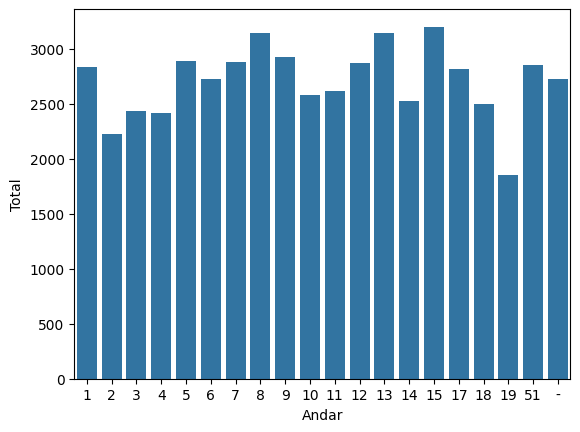

In [23]:
yx = sns.barplot(data = agg_floor_price, x = 'floor', y = 'total');
yx.set(xlabel = 'Andar', ylabel = 'Total');

In [24]:
nineteenth_floor = aluguel_casa.query('floor == 19')
nineteenth_floor.head()

,index,city,area,rooms,bathroom,parking_space,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
768,768,Porto,60.0,2,2,1,19,accept,not furnished,341,1503.0,0.0,6,1850.0
